In [4]:
from IPython.display import Image, display_png

RDBMSとは
- データベースを作る、使うためのソフトウェア
- Relational DataBase Management System の略
- 最近のITシステムでは、RDBMSを使ってデータを管理するのが一般的
- データを表（テーブル形式）で保管する。
- データ操作用の言語SQLを用いて、データの検索および登録・更新・削除の処理を行う


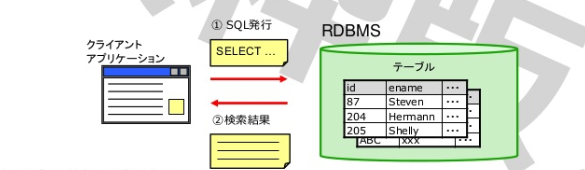

In [3]:
display_png(Image('sc04.png'))

- データの整合性を維持しやすい。  
- 簡単にデータを参照・更新できるSQLという専門用語がある。  
- 信頼性のある更新処理を実現するトランザクション機能がある。  
- 障害発生時でも格納したデータが容易に失われない。  
- セキュリティ・チューニングなど多くの周辺機能がある。  


### RDBMSでは、「テーブル形式」のデータの構造を作る必要があり、データ構造には下記の要素があります。

- テーブル名
- 列名（テーブルのデータ構造）
- 行（格納されたデータそのもの）
- 主キー（行データを特定するための特殊な列）

テーブル作成時に、各列に対するデータ型の指定と制約の制定によって、入力できる値を制限します。RDBMSには、このように指定されたデータ構造に反するデータは格納できないように制約を設定できる為、そのためデータの整合性を維持しやすいのです。

### SQL文は ３種類 
- データの検索と更新を行う「DML」
- 表、インデックス、ビューなどの作成、変更、削除などを行う「DDL」
- 権限設定・トランザクション制御などを行う「DCL」

### その中のDMLには４種類
- select：データの検索
- insert：データの追加
- update：データの更新
- delete：データの削除

ちなみにデータベースランキングですが

<h3>2018年1月のデータベース人気ランキング</h3>

<table class="Table1">
  <tbody><tr>
    <th>順位</th>
    <th>データベース</th>
    <th>スコア</th>
    <th>年間推移</th>
  </tr>
  <tr>
    <td>1</td>
    <td>Oracle</td>
    <td>1341.94</td>
    <td>ー</td>
  </tr>
  <tr>
    <td>2</td>
    <td>MySQL</td>
    <td>1299.71</td>
    <td>ー</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Microsoft SQL Server</td>
    <td>1148.07</td>
    <td>ー</td>
  </tr>
  <tr>
    <td>4</td>
    <td>PostgreSQL</td>
    <td>386.18</td>
    <td>↑</td>
  </tr>
  <tr>
    <td>5</td>
    <td>MongoDB</td>
    <td>330.95</td>
    <td>↓</td>
  </tr>
  <tr>
    <td>6</td>
    <td>DB2</td>
    <td>190.28</td>
    <td>ー</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Microsoft Access</td>
    <td>126.70</td>
    <td>↑</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Cassandra</td>
    <td>123.88</td>
    <td>↓</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Redis</td>
    <td>123.14</td>
    <td>ー</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Elasticsearch</td>
    <td>122.55</td>
    <td>↑</td>
  </tr>
  <tr>
    <td>11</td>
    <td>SQLite</td>
    <td>114.25</td>
    <td>↓</td>
  </tr>
</tbody></table>

### 最初にSELECT文
- 「どの項目（列）のデータを検索するか」を指定する：SELECT
- 「どの表から検索するか」を指定する：FROM
- 「どのような条件で行を検索するか」を指定する：WHERE

SELECT  *      ←すべての列のデータを（SELECT句）  
FROM    表名   ←どの表から（FROM句）（FROM句）  
WHERE 条件 ←どんな条件(WHERE句)

。。。  
他にも  

ダウンロードをお願いします。
https://www.dropbox.com/s/t049qmjzycrakro/sakila.db?dl=0

In [11]:
import pandas as pd
import sqlalchemy as sqla
db = sqla.create_engine('sqlite:///sakila.db')

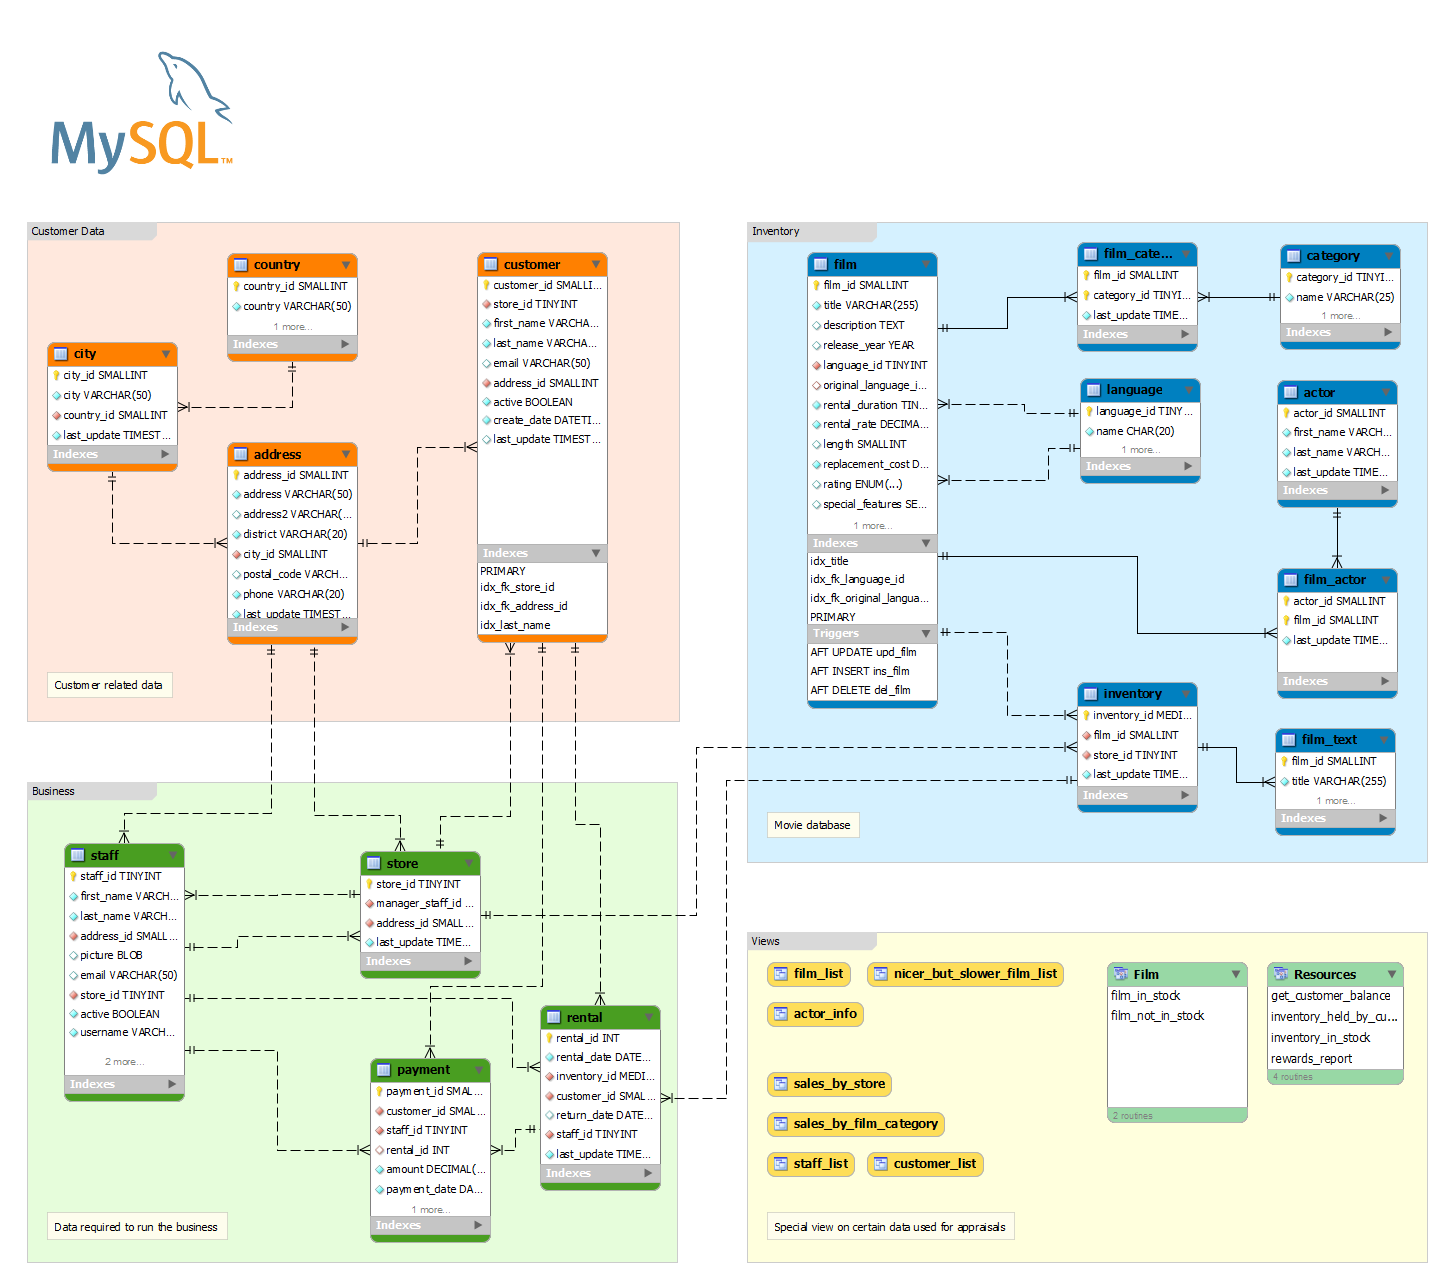

In [12]:
display_png(Image('sc03.png'))

In [20]:
sql = """
select * 
from Film
"""

In [21]:
df4 = pd.read_sql(sql, db)
df4.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2011-09-14 18:05:32
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2011-09-14 18:05:32
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2011-09-14 18:05:32
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2011-09-14 18:05:33
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2011-09-14 18:05:33


In [22]:
sql = """
select * 
from Film
where film_id = 1
"""

In [23]:
df4 = pd.read_sql(sql, db)
df4

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2011-09-14 18:05:32


### update　文
UPDATE  表名  
SET    列名 = 値   
WHERE　更新する行を特定する条件;  

### delete 文
DELETE  FROM  表名  
WHERE　削除する行を特定する条件;

### ただ、運用を考えた場合にはDELETE文は使われない。

カラムの中に削除フラグ（DELETE_FLAG）みたいなカラムが作られてそこで制御している。  

UPDATE   
DELETE_FLAG = 1

SELECT文も
WHERE条件に削除フラグが設定されていないもののみ出すようになっていたりする。